# Convolutional Neural Network

### Importing the libraries

In [ ]:
pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install keras

In [ ]:
import zipfile

local_zip = '/content/drive/MyDrive/Demo_Projects/CatsAndDogs/archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Demo_Projects/CatsAndDogs')

zip_ref.close()

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
tf.__version__

'2.6.0'

In [ ]:
import os
train_dog_dir = os.path.join('/content/drive/MyDrive/Demo_Projects/CatsAndDogs/dataset/training_set/dogs')

train_cat_dir = os.path.join('/content/drive/MyDrive/Demo_Projects/CatsAndDogs/dataset/training_set/cats')

valid_dog_dir = os.path.join('/content/drive/MyDrive/Demo_Projects/CatsAndDogs/dataset/test_set/dogs')

valid_cat_dir = os.path.join('/content/drive/MyDrive/Demo_Projects/CatsAndDogs/dataset/test_set/cats')

In [ ]:
train_dog_names = os.listdir(train_dog_dir)
print(train_dog_names[:10])

train_cat_names = os.listdir(train_cat_dir)
print(train_cat_names[:10])

validation_dog_hames = os.listdir(valid_dog_dir)
print(validation_dog_hames[:10])

validation_cat_names = os.listdir(valid_cat_dir)
print(validation_cat_names[:10])

['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.1001.jpg', 'dog.1002.jpg', 'dog.1003.jpg', 'dog.1004.jpg', 'dog.1005.jpg', 'dog.1006.jpg']
['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.1001.jpg', 'cat.1002.jpg', 'cat.1003.jpg', 'cat.1004.jpg', 'cat.1005.jpg', 'cat.1006.jpg']
['dog.4001.jpg', 'dog.4002.jpg', 'dog.4003.jpg', 'dog.4004.jpg', 'dog.4005.jpg', 'dog.4006.jpg', 'dog.4007.jpg', 'dog.4008.jpg', 'dog.4009.jpg', 'dog.4010.jpg']
['cat.4001.jpg', 'cat.4002.jpg', 'cat.4003.jpg', 'cat.4004.jpg', 'cat.4005.jpg', 'cat.4006.jpg', 'cat.4007.jpg', 'cat.4008.jpg', 'cat.4009.jpg', 'cat.4010.jpg']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

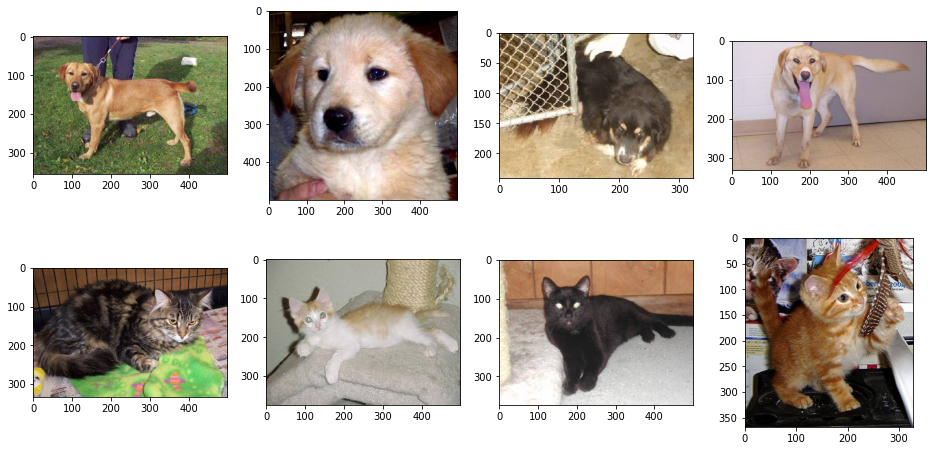

In [ ]:
fig = plt.gcf()                                            # GCF stands for Get Current Figure. plt. gcf() allows you to get a reference to the current figure when using pyplot
fig.set_size_inches(ncols * 4, nrows * 4)                  # used to set the figure size in inches

pic_index += 4
next_dog_pic = [os.path.join(train_dog_dir, fname) 
                for fname in train_dog_names[pic_index-4:pic_index]]
next_cat_pic = [os.path.join(train_cat_dir, fname) 
                for fname in train_cat_names[pic_index-4:pic_index]]

for i, img_path in enumerate(next_dog_pic + next_cat_pic):                  #Enumerate() method adds a counter to an iterable, i = index, img_path =images
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On')    # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)                                                      # mpimg.imread(img_path) same as plt.imread(img_path) = reads img 
  plt.imshow(img)                                                                   # used to display data as an image

plt.show()         

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Demo_Projects/CatsAndDogs/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 120,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Demo_Projects/CatsAndDogs/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


### CNN

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

###  Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

###  Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
67/67 [==============================] - 82s 1s/step - loss: 0.6924 - accuracy: 0.5314 - val_loss: 0.6795 - val_accuracy: 0.6070
Epoch 2/15
67/67 [==============================] - 81s 1s/step - loss: 0.6541 - accuracy: 0.6145 - val_loss: 0.6237 - val_accuracy: 0.6480
Epoch 3/15
67/67 [==============================] - 80s 1s/step - loss: 0.6066 - accuracy: 0.6672 - val_loss: 0.5914 - val_accuracy: 0.6775
Epoch 4/15
67/67 [==============================] - 80s 1s/step - loss: 0.5718 - accuracy: 0.7011 - val_loss: 0.5395 - val_accuracy: 0.7320
Epoch 5/15
67/67 [==============================] - 80s 1s/step - loss: 0.5453 - accuracy: 0.7276 - val_loss: 0.5136 - val_accuracy: 0.7505
Epoch 6/15
67/67 [==============================] - 82s 1s/step - loss: 0.5155 - accuracy: 0.7506 - val_loss: 0.5052 - val_accuracy: 0.7460
Epoch 7/15
67/67 [==============================] - 84s 1s/step - loss: 0.5020 - accuracy: 0.7582 - val_loss: 0.4966 - val_accuracy: 0.7560
Epoch 8/15
67/67 [==

In [ ]:
cnn.evaluate(test_set)

63/63 [==============================] - 11s 179ms/step - loss: 0.4601 - accuracy: 0.7870


[0.46007248759269714, 0.7870000004768372]

In [ ]:
STEP_SIZE_TEST = test_set.n//test_set.batch_size
test_set.reset()
preds = cnn.predict(test_set,
                      verbose=1)

63/63 [==============================] - 11s 178ms/step


In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle
from tensorflow import keras
from tensorflow.keras import layers

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
fpr, tpr, _ = roc_curve(test_set.classes, preds)
roc_auc = auc(fpr, tpr)

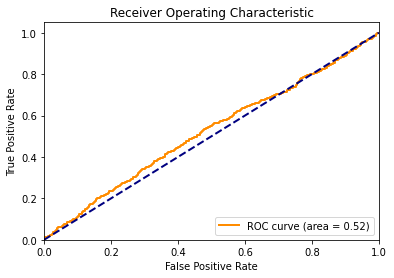

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from keras.preprocessing import image

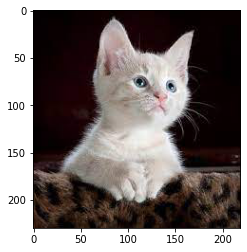

In [ ]:
path = "/content/drive/MyDrive/Demo_Projects/CatsAndDogs/cat1.jfif"
img = mpimg.imread(path)                                                      # mpimg.imread(img_path) same as plt.imread(img_path) = reads img 
plt.imshow(img)

[0.]
 Its a CAT


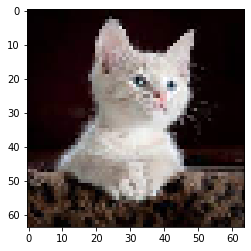

In [ ]:
img = image.load_img(path, target_size=(64,64))
x = image.img_to_array(img)
#plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = cnn.predict(images)
print(classes[0])
if classes[0][0]==1:
  plt.imshow(img)
  print(" Its a DOG")
else:
  plt.imshow(img)
  print(" Its a CAT")

[1.]
 Its a DOG


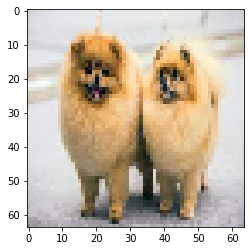

In [ ]:
img = image.load_img('/content/drive/MyDrive/Demo_Projects/CatsAndDogs/dog1.jfif', target_size=(64,64))
x = image.img_to_array(img)
#plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = cnn.predict(images)
print(classes[0])
if classes[0][0]==1:
  plt.imshow(img)
  print(" Its a DOG")
else:
  plt.imshow(img)
  print(" Its a CAT")

[1.]
 Its a DOG


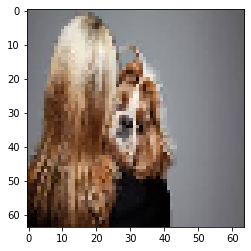

In [ ]:
path = '/content/drive/MyDrive/Demo_Projects/CatsAndDogs/dog2.jfif'
img = image.load_img(path, target_size=(64,64))
x = image.img_to_array(img)
#plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
#images = np.vstack([x])
#classes = cnn.predict(images)
classes = cnn.predict(x)
print(classes[0])
if classes[0][0]==1:
  plt.imshow(img)
  print(" Its a DOG")
else:
  plt.imshow(img)
  print(" Its a CAT")

##  Making a single prediction

cat


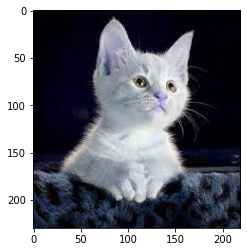

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Demo_Projects/CatsAndDogs/cat1.jfif', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
plt.imshow(img)
print(prediction)

cat


[[0.]]
